**Problem Statement:**

* Predict the percentage of marks of an student based on the number of study hours by using simple linear regression task.
* You can use R, Python,SAS Enterprise Miner or any other tool.
* What will be predicted score if a student studies for 9.25 hrs/ day?

**Solution:**
- I am using the **Python Scikit-Learn** library for machine learning. 
- **Machine learning** can used to implement **regression** functions.

Definition:**`Linear Regression`**

* **Linear Regression** is machine learning algorithm based on **supervised learning**.
* It performs **regression task**,**regression models** target prediction value on independent variables.
* Its the relationship between dependent and independent variables,number of indepenndent variable being used.

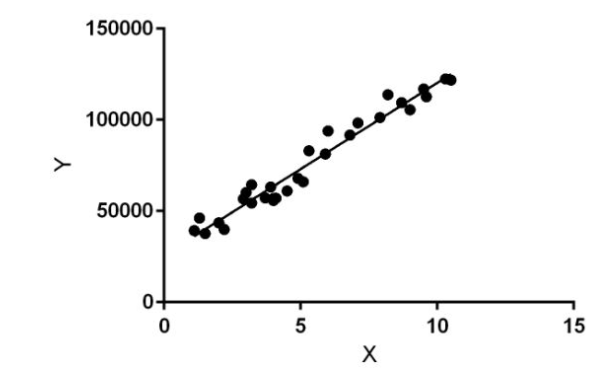

In [1]:
from IPython.display import Image
Image("D:\The Sparks Foundation\LR.png")

                  **Figure is demonstration of Simple linear regression**

`This is supervised machine learning algortihm with python scikit learn library` 

In [1]:
## Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:

data = pd.read_csv(r'D:\The Sparks Foundation\student_scores.csv')

print("**data is imported**")

data.head(10)

**data is imported**


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


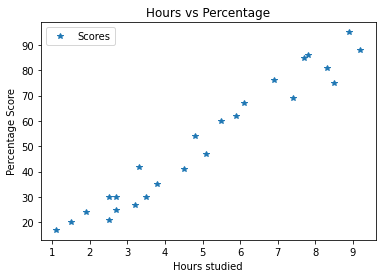

In [5]:
# visualization of data(plotting)

data.plot(x ='Hours',y = "Scores",style='*')
plt.title("Hours vs Percentage")
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()


`From above demonstartion of data, we can say that it is linearly seperable, we can use linear regression.`


**Preparing the data**

- Dividing the data into features/inputs and labels/output

In [6]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [7]:
# splitting data into training and test sets by using scikit-learn buit-in function.

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**Training the model**

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

print('Model training is completed')

Model training is completed


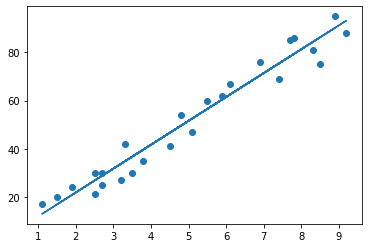

In [9]:
## plotting the regression line
line = regressor.coef_*X+regressor.intercept_

#plotting the test area
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [10]:
# Predictions Time

print("Its Prediction Time")


Its Prediction Time


In [11]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing actual vs predicted
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Question: What will be predicted score if a student studies for 9.25 hrs/ day?**

In [13]:
hours = 9.25
pred = regressor.predict([[hours]])
print("No of hours = {}".format(hours))
print("Predicted score = {}".format(pred[0]))

No of hours = 9.25
Predicted score = 93.69173248737535


## Value Error Solution

If we are assigning one dimensionsal array to the code : `pred = regressor.predict(hours)`, it will result to this error

**ValueError: Expected 2D array, got scalar array instead:array=9.25.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) 
if it contains a single sample.**

To solve this issue we are using this `pred = regressor.predict([[hours]])`, It is the best way to solve the problem.



## Evaluating the model
- `This Evaluation metrics main purpose is to detemine the perfomance of a particular dataset`

In [14]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("RMAE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 4.183859899002975
MSE : 21.598769307217406
RMAE : 4.647447612100367


In [15]:
import pickle
file = open("Task_1.pkl","wb")
pickle.dump(regressor,file)